## Rotina para criar um modelo no GemPy
- Aqui estou usando o resultado do modelo gerado pelo StratBR

In [14]:
import math
import gempy as gp
import pickle
import warnings
import datetime

warnings.filterwarnings("ignore")

A primeira coisa que devemos fazer é determinar o path onde contém o surface_points e orientations points, e também aonde você quer salvar o modelo.

Depois passamos os parâmetros para o modelo: nome do modelo, a resolução e a extensão.

OBS: O sp e op são arquivos .csv, tendo a seguinte estrutura: sp: X,Y,Z,formation e op: X,Y,Z,dip,azimuth,polarity,formation. Para mais infos acesso o site do GemPy e leia a documentação (https://www.gempy.org/documentation).

In [2]:
data_path = "../../../input/BES/stratbr/stratbr_grid_v3/gempy_format/"
save_path_model = "../../../output/BES/StartBR/novos_testes/gempy_2.3.1/"

model_name = "StratBR2GemPy" # Nome do seu modelo
extent = [0, 179000, 0, 148000, -17500, 1000] # Extensão do modelo (xmin, xmax, ymin, ymax, zmin, zmax)
resolution = [50, 50, 50] # Resolução do modelo (x, y, z) - Cuidado aqui! 

Com isso, já podemos iniciar o nosso modelo

In [3]:
geo_model = gp.create_model(model_name)
gp.init_data(
    geo_model,
    extent=extent,
    resolution=resolution,
    path_i=data_path + "2_merged_sp_reduced_more_z_ajusted.csv",
    path_o=data_path + "orientations_points_v3_7.csv",
)

Active grids: ['regular']


StratBR2GemPy  2024-03-15 09:22

Com o modelo iniciado, precisamos linkar as nossas formations a uma série, sendo que a ordem das formations devem ser das mais novas para as mais antigas.

Além disso, cada série precisa ter pelo menos UM valor de orientação. Neste exemplo só temos uma série (Strat_Series), então só precisamos de uma orientação. Caso tenha mais de uma série, é necessário fazer esse ajuste.

OBS: O basement é criado automaticamente pelo GemPy, ele não precisa de ponto de orientação, só precisa definir a série dele.

In [4]:
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series": (
            "TOP",
            "bes_89",
            "bes_90",
            "bes_91",
            "bes_92",
            "bes_93",
            "bes_94",
            "bes_95",
            "bes_96",
            "bes_97",
            "bes_98",
            "bes_99",
            "bes_100",
        ),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,TOP,Strat_Series,1,#015482,1
1,bes_89,Strat_Series,2,#9f0052,2
2,bes_90,Strat_Series,3,#ffbe00,3
3,bes_91,Strat_Series,4,#728f02,4
4,bes_92,Strat_Series,5,#443988,5
5,bes_93,Strat_Series,6,#ff3f20,6
6,bes_94,Strat_Series,7,#5DA629,7
7,bes_95,Strat_Series,8,#4878d0,8
8,bes_96,Strat_Series,9,#ee854a,9
9,bes_97,Strat_Series,10,#6acc64,10


In [7]:
# Podemos ver os nossos dados com o seguinte comando:
geo_model.get_data()

X         Y      Z    smooth  surface   
surface_points 0          0.0       0.0  -2844  0.000002      TOP  \
               1      10000.0       0.0  -3870  0.000002      TOP   
               2      20000.0       0.0  -3587  0.000002      TOP   
               3      30000.0       0.0  -4059  0.000002      TOP   
               4      40000.0       0.0  -4286  0.000002      TOP   
...                       ...       ...    ...       ...      ...   
               7620  150000.0  148000.0 -14455  0.000002  bes_100   
               7632  160000.0  148000.0 -14847  0.000002  bes_100   
               7644  170000.0  148000.0 -15043  0.000002  bes_100   
               7656  179000.0  148000.0 -15065  0.000002  bes_100   
orientations   0          0.0       0.0  -2844  0.010000      TOP   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               1              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               3              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
...                           ...           ...  ...  
               7620           NaN           NaN  NaN  
               7632           NaN           NaN  NaN  
               7644           NaN           NaN  NaN  
               7656           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  

[7658 rows x 8 columns]

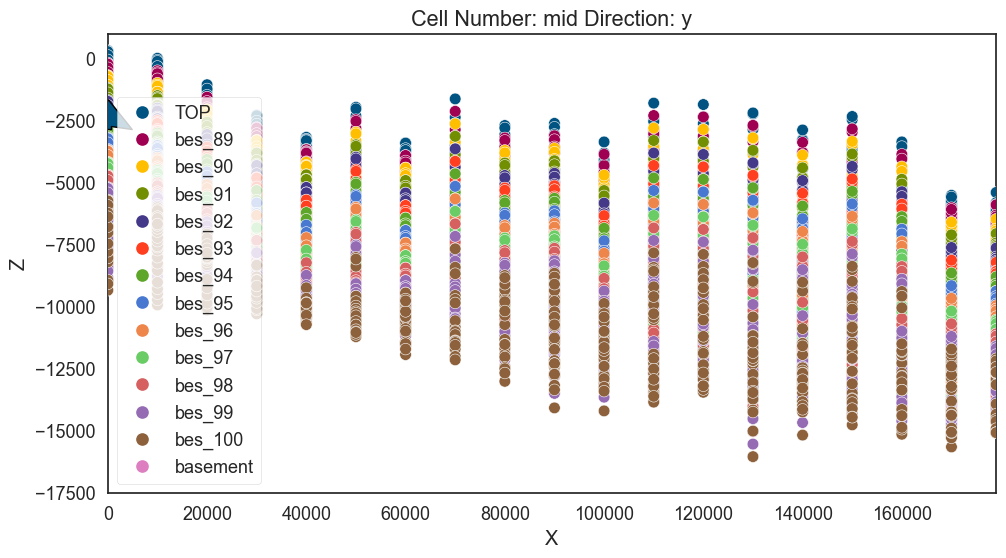

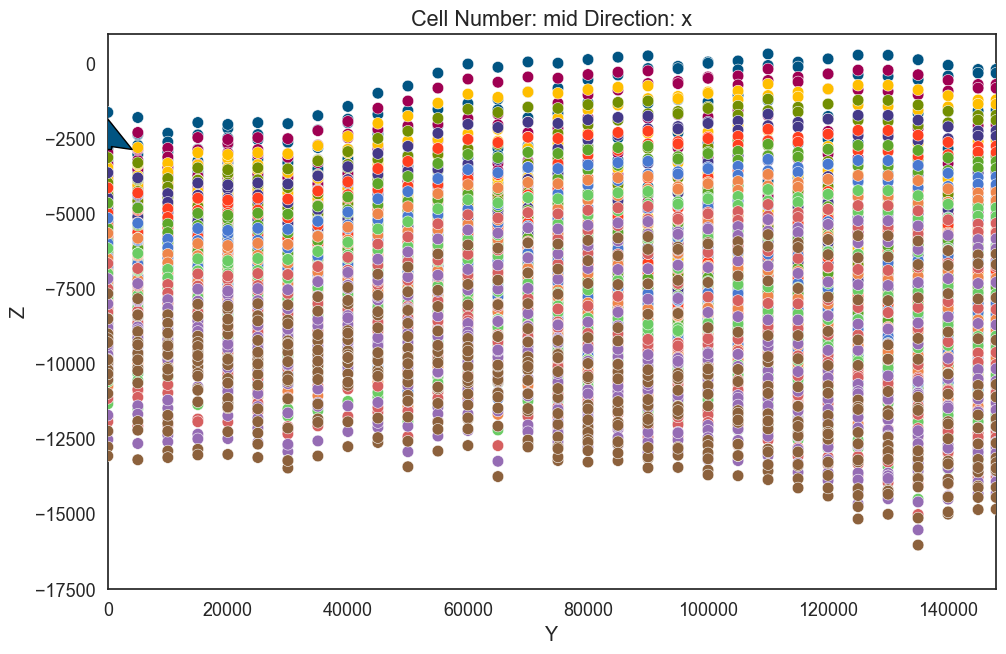

In [8]:
# Para visualizar os dados, podemos usar o seguinte comando:
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=5, legend=True) 
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=5, legend=False)
#gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=5, legend=False)

In [9]:
# Em 3D usamos o seguinte comando:
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5
) # Comente essa linha se quiser rodar o arquivo inteiro de uma vez, ou vai dar erro.

Caso tudo esteja certo, podemos continuar com a modelagem. Se não, reveja os passos anteriores.

Agora vamos fazer a interpolação dos dados e depois computar o modelo.

In [10]:
%%time
gp.set_interpolator(
    geo_model, 
    compile_theano=True, 
    theano_optimizer='fast_compile', # fast_compile, fast_run
    dtype="float64",  # for model stability
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                             values
range                232996.244605
$C_o$            1292553571.428571
drift equations             [3, 3]
CPU times: total: 17.8 s
Wall time: 18.6 s


In [12]:
%%time
# Aqui pode demorar
sol = gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 12min 5s
Wall time: 4min 44s


Com o modelo gerado, podemos visualizar o resultado, tanto em 2D quando em 3D.

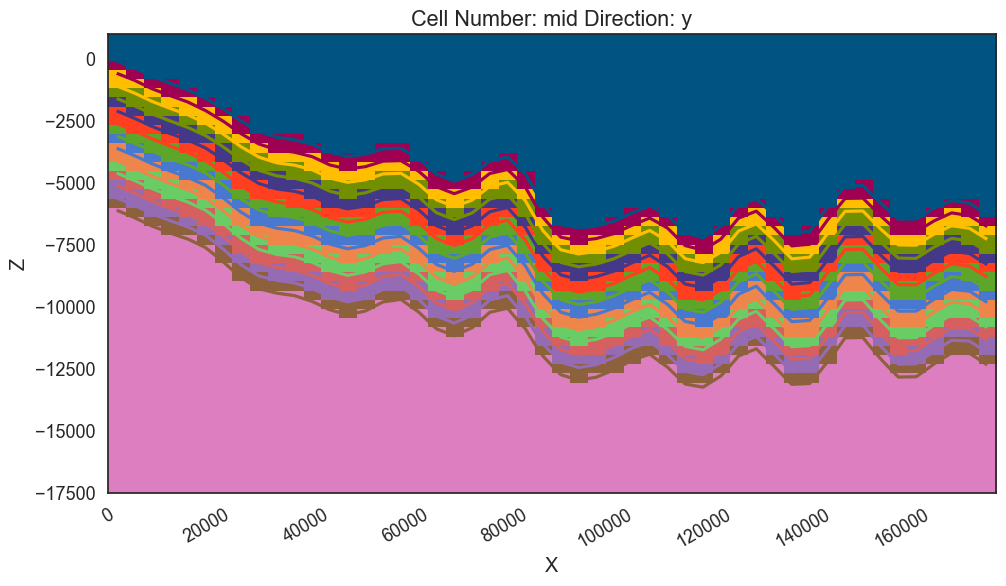

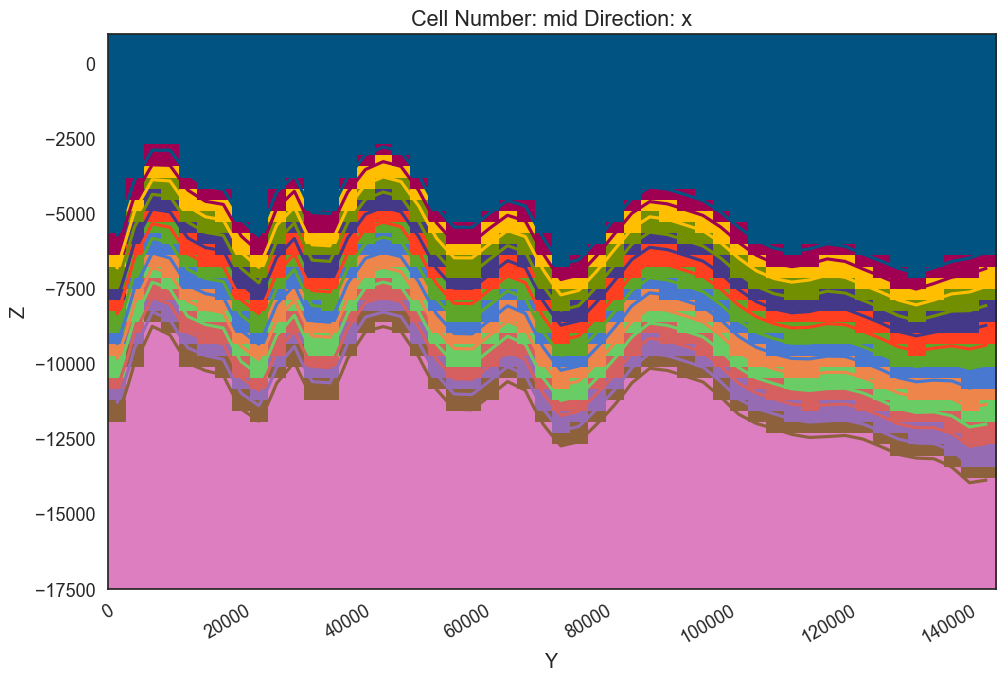

In [13]:
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True, ve=5, legend=True)
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True, ve=5, legend=True)
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5) # Comente essa linha se quiser rodar o arquivo inteiro de uma vez, ou vai dar erro.

Para salvar o nosso modelo, temos duas opção:

1. Salvar o modelo em um arquivo .pkl, que é um arquivo binário que contém todas as informações do modelo. Com isso, podemos carregar o modelo em outro notebook, sem a necessidade de fazer a modelagem novamente.

2. Salvar o modelo em zip, que o resultado vem em .csv e .npy com as infos do modelo. Nesse caso, é preciso fazer a modelagem novamente para visualizar o resultado. Porém, você consegue acessar as infos do seu modelo, sem a necessidade de abrir o arquivo .pkl.

In [16]:
# Pkl file
date_t = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
fn = f"{model_name}_{resolution[0]}x_{resolution[1]}y_{resolution[2]}z_{date_t}.pkl"
with open(save_path_model + fn, "wb") as f:
    pickle.dump(geo_model, f)

# Csv e npy
#gp.save_model(
#    geo_model,
#    compress=True,
#)

Notebook finalizado. O GemPy tem muitas outras funcionalidades, veja a documentação para mais informações.